In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import os
import datetime
from tqdm.auto import tqdm
import pickle
import gc
import matplotlib.pyplot as plt

## Preprocess Data

In [2]:
data_path = './Data/'

fc_data = pd.read_pickle(data_path + "stock_price_all.pkl")
fc_data

,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj Close_TSLA,Volume_TSLA,Open_GM,High_GM,Low_GM,Close_GM,...,Close_F,Adj Close_F,Volume_F,Price_DJAHD,Open_DJAHD,High_DJAHD,Low_DJAHD,Vol._DJAHD,Change %_DJAHD,Europe Brent Spot Price FOB Dollars per Barrel
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,41.950001,42.119999,40.139999,40.509998,...,8.52,7.722802,85043100,882.86,875.67,900.12,870.29,148370000.0,2.50,50.37
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,40.060001,41.840000,40.040001,41.660000,...,8.65,7.840636,70127800,891.16,876.49,896.46,872.02,118400000.0,0.94,53.16
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,41.919998,43.849998,41.860001,42.980000,...,8.84,8.012860,72590200,916.56,915.63,937.07,908.37,140230000.0,2.85,53.80
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,43.980000,43.980000,42.959999,43.320000,...,9.06,8.212275,77117100,980.89,940.51,981.91,939.29,141230000.0,7.02,53.70
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,43.310001,43.490002,42.320000,43.060001,...,9.00,8.157888,59162200,1046.75,1022.40,1051.36,1003.05,152540000.0,6.71,55.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,178.080002,186.440002,176.350006,183.250000,183.250000,129684400,33.450001,34.250000,33.270000,33.619999,...,11.18,11.180000,74975100,1311.02,1322.00,1334.84,1309.05,100650000.0,-0.88,85.86
2023-03-21,188.279999,198.000000,188.039993,197.580002,197.580002,153391400,34.630001,35.320000,34.459999,35.099998,...,11.72,11.720000,74794900,1311.02,1322.00,1334.84,1309.05,100650000.0,-0.88,85.86
2023-03-22,199.300003,200.660004,190.949997,191.149994,191.149994,150376400,35.130001,35.320000,34.029999,34.049999,...,11.48,11.480000,69729100,1311.02,1322.00,1334.84,1309.05,100650000.0,-0.88,85.86


In [3]:
fc_data.columns

Index(['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA', 'Adj Close_TSLA',
       'Volume_TSLA', 'Open_GM', 'High_GM', 'Low_GM', 'Close_GM',
       'Adj Close_GM', 'Volume_GM', 'Open_F', 'High_F', 'Low_F', 'Close_F',
       'Adj Close_F', 'Volume_F', 'Price_DJAHD', 'Open_DJAHD', 'High_DJAHD',
       'Low_DJAHD', 'Vol._DJAHD', 'Change %_DJAHD',
       'Europe Brent Spot Price FOB  Dollars per Barrel'],
      dtype='object')

In [4]:
features_list = ['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA', 'Adj Close_TSLA', 'Volume_TSLA', 
                 'Price_DJAHD', 'Europe Brent Spot Price FOB  Dollars per Barrel'] 
fc_df = fc_data[features_list]
fc_df

,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj Close_TSLA,Volume_TSLA,Price_DJAHD,Europe Brent Spot Price FOB Dollars per Barrel
Date,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,882.86,50.37
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,891.16,53.16
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,916.56,53.80
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,980.89,53.70
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,1046.75,55.51
...,...,...,...,...,...,...,...,...
2023-03-20,178.080002,186.440002,176.350006,183.250000,183.250000,129684400,1311.02,85.86
2023-03-21,188.279999,198.000000,188.039993,197.580002,197.580002,153391400,1311.02,85.86
2023-03-22,199.300003,200.660004,190.949997,191.149994,191.149994,150376400,1311.02,85.86


In [5]:
data_arr = fc_df.loc[:, fc_df.columns != "Date"].to_numpy()
data_arr

array([[2.39820007e+02, 2.48163330e+02, 2.39063339e+02, ...,
        1.45914600e+08, 8.82860000e+02, 5.03700000e+01],
       [2.41220001e+02, 2.46946671e+02, 2.39733337e+02, ...,
        9.67356000e+07, 8.91160000e+02, 5.31600000e+01],
       [2.52830002e+02, 2.58000000e+02, 2.49699997e+02, ...,
        1.34100000e+08, 9.16560000e+02, 5.38000000e+01],
       ...,
       [1.99300003e+02, 2.00660004e+02, 1.90949997e+02, ...,
        1.50376400e+08, 1.31102000e+03, 8.58600000e+01],
       [1.95259995e+02, 1.99309998e+02, 1.88649994e+02, ...,
        1.44193900e+08, 1.31102000e+03, 8.58600000e+01],
       [1.91649994e+02, 1.92360001e+02, 1.87149994e+02, ...,
        1.16531600e+08, 1.31102000e+03, 8.58600000e+01]])

In [6]:
input_days = 30
output_days = 1
train_num = 496
train_data_num = train_num + input_days + output_days
mean_arr = data_arr[:train_num , :].mean(axis = 0)
std_arr = data_arr[:train_num, :].std(axis = 0)

In [7]:
tilde_data = (data_arr - mean_arr)/std_arr
tilde_data

array([[-4.51115485e-01, -3.95572629e-01, -3.50423870e-01, ...,
         2.04986076e+00, -1.30661591e+00, -1.89825891e+00],
       [-4.24975804e-01, -4.17728128e-01, -3.37544792e-01, ...,
         4.46028672e-01, -1.26590238e+00, -1.74919566e+00],
       [-2.08202205e-01, -2.16445828e-01, -1.45960111e-01, ...,
         1.66456145e+00, -1.14130917e+00, -1.71500193e+00],
       ...,
       [-1.20767592e+00, -1.26061323e+00, -1.27528533e+00, ...,
         2.19536957e+00,  7.93613571e-01, -2.11017834e-03],
       [-1.28310806e+00, -1.28519699e+00, -1.31949727e+00, ...,
         1.99374506e+00,  7.93613571e-01, -2.11017834e-03],
       [-1.35051140e+00, -1.41175717e+00, -1.34833111e+00, ...,
         1.09161846e+00,  7.93613571e-01, -2.11017834e-03]])

In [8]:
# Ground Truth: Up or Down
if_up = data_arr[1:, 3] > data_arr[:-1, 3]
iu_tensor = torch.tensor(if_up, dtype=torch.float)
iu_tensor

tensor([1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 

In [9]:
X = []
Y = []
for i in range(tilde_data.shape[0] - input_days - output_days + 1):
    X.append(tilde_data[i:i+input_days, :].T)
    Y.append(if_up[i+input_days - 1:i+input_days+output_days-1])
    
X_arr = np.array(X)
Y_arr = np.array(Y)

X_train = torch.tensor(X_arr[:train_num], dtype=torch.float)
Y_train = torch.tensor(Y_arr[:train_num], dtype=torch.float)
X_test = torch.tensor(X_arr[train_num:], dtype=torch.float)
Y_test = torch.tensor(Y_arr[train_num:], dtype=torch.float)

### The Evaluation Function

In [10]:
def eval_model(testX, testY, model, loss_func):
    model.eval()
    test_num = testX.shape[0]
    result = np.ones(test_num)
    eval_losses = []
    TP = 0
    FP = 0
    FN = 0
    for i in tqdm(range(test_num), desc = "evaluation", leave = False):
        outputs = model.forward(testX[i])
        loss = loss_func(outputs, testY[i])
        result[i] = outputs>0.5
        model.zero_grad()
        eval_losses.append(loss.item())
        if result[i]==1:
            if testY[i] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if testY[i] == 1:
                FN += 1
        
    model.train()
    return {'losses': np.array(eval_losses).mean(), 'accuracy': (result == testY.numpy()).mean(),
           'Precision': TP/(TP+FP + 1e-8), 'Recall': TP/(TP+FN  + 1e-8 ), 'F-1': 2*TP/(2*TP + FP + FN + 1e-8)}

### CNN Model

In [11]:
class CNN_model(nn.Module):
    def __init__(self, input_size = 8, in_length = 30, out_length = 1):
        super(CNN_model, self).__init__()
        self.conv_a = nn.Conv1d(input_size, 16, 9, stride=1)
        self.max_pool_a = nn.MaxPool1d(2, stride=1)
        self.conv_b = nn.Conv1d(16, 32, 6, stride=1)
        self.max_pool_b = nn.MaxPool1d(2, stride=1)
        self.activation = nn.ReLU()
        self.denseLayer = nn.Linear(32*(in_length-15), out_length)
        self.output_layer = nn.Sigmoid()
        self.conv_a.weight.data.uniform_(-2e-3, 2e-3)
        self.conv_b.weight.data.uniform_(-2e-3, 2e-3)
        self.denseLayer.weight.data.uniform_(-2e-3, 2e-3)
        
    def forward(self, x):
        x = self.activation(self.max_pool_a(self.conv_a(x)))
        x = self.activation(self.max_pool_b(self.conv_b(x)))
        return self.output_layer(self.denseLayer(torch.flatten(x, start_dim=0)))

In [12]:
cnn_train_subset_result = []
num_epoch = 2
loss_fn = nn.BCELoss()
set_size_list = [31, 62, 124, 248, 496]
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

for set_size in tqdm(set_size_list, desc = "train_size"):
    train_ids_list = []
    for i in range(10):
        train_ids_list.append(np.random.permutation(np.arange(train_num))[:set_size])
            
    cnn_losses_eval = []
    for k in tqdm(range(len(train_ids_list)), desc = "k", leave = False):
        cnn_model = CNN_model()
        optimizer = torch.optim.AdamW(cnn_model.parameters(), lr=5e-4)
        cnn_model.train()
        
        for i in range(num_epoch):
            for j in tqdm(train_ids_list[k], desc = "Train", leave = False):
                outputs = cnn_model.forward(X_train[j])
                loss = loss_fn(outputs, Y_train[j])
                loss.backward()
                optimizer.step()
                cnn_model.zero_grad()
                
        cnn_losses_eval.append(eval_model(X_test, Y_test, cnn_model, loss_fn))
        del cnn_model
        gc.collect()
        
    cnn_train_subset_result.append(cnn_losses_eval)

train_size:   0%|          | 0/5 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

In [13]:
cnn_loss_result = []
for results in cnn_train_subset_result:
    mean_loss = 0
    for result in results:
        mean_loss += result["losses"]
        
    print(mean_loss/10)
    cnn_loss_result.append(mean_loss/10)

0.6925663353765713
0.6931354720802867
0.6932108933434766
0.6942436963319778
0.6919606308726703


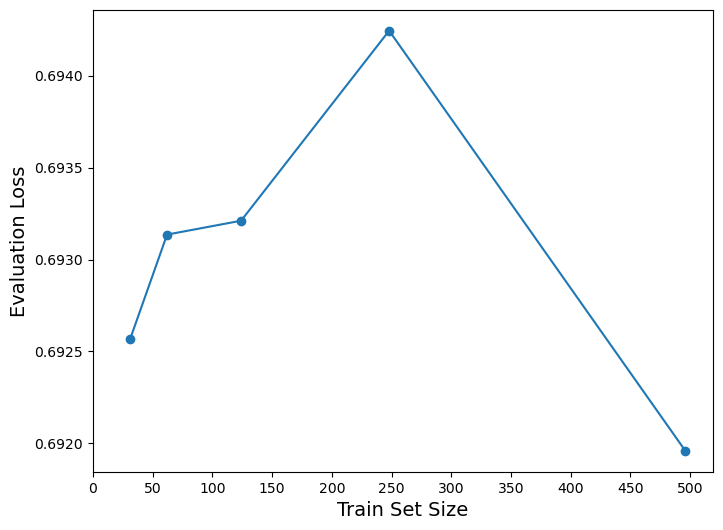

In [14]:
if not os.path.exists('./result'):
    os.mkdir('./result')

plt.figure(figsize=(8, 6))
plt.plot(set_size_list, cnn_loss_result, '-o')
plt.xlabel("Train Set Size", fontsize = 14)
plt.ylabel("Evaluation Loss", fontsize = 14)
plt.xticks(np.arange(0, 501, step=50))
plt.savefig('./result/no_nlp_cnn.png')
plt.savefig('./result/no_nlp_cnn.eps')
plt.show()

### GRU Model

In [13]:
class GRU_Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, num_layers, output_dim, if_bidirect = False):
        super(GRU_Model, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.num_direct = 2 if if_bidirect else 1
        self.linear_layer_a = nn.Linear(input_dim, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional = if_bidirect)
        self.linear_layer_b = nn.Linear(self.num_direct*hidden_dim, output_dim)
        self.output_layer = nn.Sigmoid()

        # Initialize
        self.linear_layer_a.weight.data.uniform_(-1e-3, 1e-3)
        self.linear_layer_b.weight.data.uniform_(-1e-3, 1e-3)
        
    
    def forward(self, inputs):
        inputs = self.linear_layer_a(inputs.T)
        x, _ = self.gru(inputs, None)
        if self.num_direct == 2:
            x = torch.cat((x[-1, :self.hidden_dim], x[0, self.hidden_dim:]), 0)
        else:
            x = x[-1, :] 
        x = self.linear_layer_b(x)
        return self.output_layer(x)

In [17]:
input_dim = 8
embedding_dim = 32
hidden_dim = 64
num_layers = 2
output_dim = 1

gru_train_subset_result = []
num_epoch = 2
loss_fn = nn.BCELoss()

seed = 12
np.random.seed(seed)
torch.manual_seed(seed)

for set_size in tqdm(set_size_list, desc = "train_size"):
    train_ids_list = []
    gru_losses_eval = []
    for i in range(10):
        train_ids_list.append(np.random.permutation(np.arange(train_num))[:set_size])
            
    for k in tqdm(range(len(train_ids_list)), desc = "k", leave = False):
        gru_model = GRU_Model(input_dim, embedding_dim, hidden_dim, num_layers, output_dim)
        optimizer = torch.optim.AdamW(gru_model.parameters(), lr=1e-3)
        gru_model.train()
        
        for i in range(num_epoch):
            for j in tqdm(train_ids_list[k], desc = "Train", leave = False):
                outputs = gru_model.forward(X_train[j])
                loss = loss_fn(outputs, Y_train[j])
                loss.backward()
                optimizer.step()
                gru_model.zero_grad()
                
        gru_losses_eval.append(eval_model(X_test, Y_test, gru_model, loss_fn))
        del gru_model
        gc.collect()
        
    gru_train_subset_result.append(gru_losses_eval)

train_size:   0%|          | 0/5 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Train:   0%|          | 0/31 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

Train:   0%|          | 0/62 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

Train:   0%|          | 0/124 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

Train:   0%|          | 0/248 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

k:   0%|          | 0/10 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

Train:   0%|          | 0/496 [00:00<?, ?it/s]

evaluation:   0%|          | 0/34 [00:00<?, ?it/s]

In [18]:
gru_loss_result = []
for results in gru_train_subset_result:
    mean_loss = 0
    for result in results:
        mean_loss += result["losses"]
        
    print(mean_loss/10)
    gru_loss_result.append(mean_loss/10)

0.7005701340296688
0.700591556201963
0.6931448024861953
0.6930644741829702
0.6918373807388194


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(set_size_list, gru_loss_result, '-o')
plt.xlabel("Train Set Size", fontsize = 14)
plt.ylabel("Evaluation Loss", fontsize = 14)
plt.xticks(np.arange(0, 501, step=50))
plt.savefig('./result/no_nlp_gru.png')
plt.savefig('./result/no_nlp_gru.eps')
plt.show()